1-1.tif : 0.4976 mm
 1-1.tif: 0.6995 mm
1-2.tif : 0.5559 mm
 1-2.tif: 0.6227 mm
1-3.tif : 0.5705 mm
 1-3.tif: 0.6207 mm
1-4.tif : 0.4594 mm
 1-4.tif: 0.4497 mm
1-5.tif : 0.4962 mm
 1-5.tif: 0.5314 mm
10-1.tif : 0.2747 mm
 10-1.tif: 0.5297 mm
10-2.tif : 0.2935 mm
 10-2.tif: 0.2534 mm
10-3.tif : 0.4963 mm
 10-3.tif: 0.5594 mm
10-4.tif : 0.5709 mm
 10-4.tif: 0.5150 mm
10-5.tif : 0.4161 mm
 10-5.tif: 0.4688 mm
11-1.tif : 0.4437 mm
 11-1.tif: 0.6236 mm
11-2.tif : 0.5583 mm
 11-2.tif: 0.6028 mm
11-3.tif : 0.5385 mm
 11-3.tif: 0.4824 mm
11-4.tif : 0.5002 mm
 11-4.tif: 0.5457 mm
11-5.tif : 0.4295 mm
 11-5.tif: 0.3385 mm
12-1.tif : 0.4470 mm
 12-1.tif: 0.6582 mm
12-2.tif : 0.3382 mm
 12-2.tif: 0.7068 mm
12-3.tif : 0.3194 mm
 12-3.tif: 0.4627 mm
12-4.tif : 0.4923 mm
 12-4.tif: 0.5443 mm
13-1.tif : 0.5838 mm
 13-1.tif: 0.6655 mm
 13-2.tif: 0.7203 mm
13-3.tif : 0.5401 mm
 13-3.tif: 0.4365 mm
13-4.tif : 0.4098 mm
 13-4.tif: 0.6003 mm
13-5.tif : 0.4493 mm
 13-5.tif: 0.4805 mm
14-1.tif : 0.5637 mm
 1

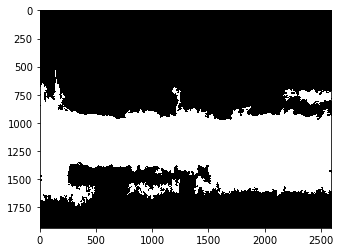

In [62]:
#線寬分類
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
def read_directory(directory_name):
    
    for filename in os.listdir(r"./"+directory_name):
 
        img = cv2.imread(directory_name + "/" + filename)
        



        zeros = np.zeros(img.shape, dtype = "uint8") 


        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(img2, (11, 11), 0)
        RET, imgBW = cv2.threshold(blurred,57,255,cv2.THRESH_BINARY_INV)#正光
        contours, hierarchy = cv2.findContours(imgBW.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )
                                        #TREE取得所有輪廓EXTERNAL取最外層輪廓
        for i in range(0,len(contours)):
    
            if contours[i].size>500:         
                cv2.drawContours(zeros, contours, i, (255,255,255),-1)        
        plt.imshow(zeros)
        cv2.waitKey(0)
        
        pixel=0
        summ=0
        i=0
        for x in range(0,1300,100):
                for y in range(0,zeros.shape[0]-1):
        
                    (r,g,b)=zeros[y,x]
        
                    if r!=0: #rgb (0,0,0)黑色 (255,255,255)白色
                        pixel+=1
                    elif r==0 and pixel!=0:
                        if pixel>150 and pixel<1000:
                            summ=summ+pixel
                            i+=1
                    
                        pixel=0
        if(summ!=0):        
            print("{} : {:.4f} mm".format( filename,(summ/i)/1296))

        pixel=0
        summ=0
        i=0
        for x in range(1300,zeros.shape[1]-1,100):
                for y in range(0,zeros.shape[0]-1):
        
                    (r,g,b)=zeros[y,x]
        
                    if r!=0:
                        pixel+=1
                    elif r==0 and pixel!=0:
                        if pixel>150 and pixel<1000:
                            summ=summ+pixel
                            i+=1
                    
                        pixel=0
        if(summ!=0):
            print(" {}: {:.4f} mm".format( filename,(summ/i)/1296))
read_directory("5x")

-1

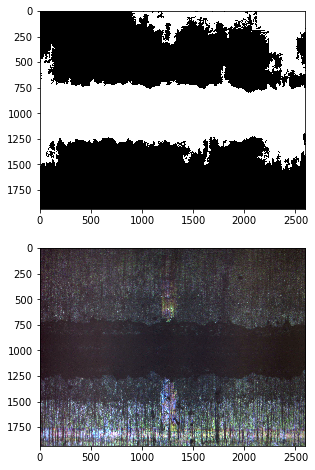

In [117]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('5x/16-3.tif')


zeros = np.zeros(img.shape, dtype = "uint8") 


img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(img2, (11, 11), 0)
RET, imgBW = cv2.threshold(blurred,50,255,cv2.THRESH_BINARY_INV)#正光
contours, hierarchy = cv2.findContours(imgBW, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )
                                        #TREE取得所有輪廓EXTERNAL取最外層輪廓
for i in range(0,len(contours)):
    #zeros = np.zeros(img.shape, dtype = "uint8")
    if contours[i].size>5000:         
        cv2.drawContours(zeros, contours, i, (255,255,255),-1)
plt.figure(num='cut',figsize=(8,8))
plt.subplot(2,1,1)
plt.imshow(zeros)
plt.subplot(2,1,2)
plt.imshow(img)

cv2.waitKey(0)


40


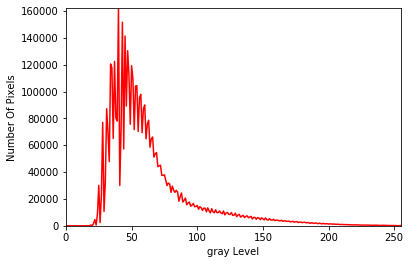

In [114]:
#繪製灰階的直方圖
import cv2
import numpy as np
import matplotlib.pyplot as plt


def plot(grayHist):
    plt.plot(range(256), grayHist, 'r', linewidth=1.5, c='red')
    y_maxValue = np.max(grayHist)
    plt.axis([0, 255, 0, y_maxValue]) # x和y的范围
    plt.xlabel("gray Level")
    plt.ylabel("Number Of Pixels")
    plt.show()


if __name__ == "__main__":
    # 讀取圖片並轉換成灰度圖
    
    #img = cv2.imread(r'C:\Users\Milk\Documents\Python Scripts\1-1.tif', 0)
    img = cv2.imread('5x/16-3.tif', 0)
    
    # 图像的高、宽
    h, w = img.shape
    # 圖片的灰階範圍是0~255
    grayHist = np.zeros([256], np.uint64)

    # 統計每個灰度的像素個數
    for i in range(h):
        for j in range(w):
            grayHist[img[i][j]] += 1
    
    #統計最多的灰度
    maxGray=0
    color=0
    for i in range(256):
        if (grayHist[i]>maxGray):
            maxGray=grayHist[i]
            color=i
            
    print(color)
    
    
    

    # 绘制直方图
    plot(grayHist)

In [119]:
#線寬分類
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
def read_directory(directory_name):
    
    for filename in os.listdir(r"./"+directory_name):
        imgColor=cv2.imread(directory_name + "/" + filename,0)
        h,w=imgColor.shape
        grayHist = np.zeros([256], np.uint64)
        for i in range(h):
            for j in range(w):
                grayHist[imgColor[i][j]] += 1
    

        maxGray=0
        color=0
        for i in range(256):
            if (grayHist[i]>maxGray):
                maxGray=grayHist[i]
                color=i
        color=color+15
        
 
        img = cv2.imread(directory_name + "/" + filename)
        



        zeros = np.zeros(img.shape, dtype = "uint8") 


        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(img2, (11, 11), 0)
        RET, imgBW = cv2.threshold(blurred,color,255,cv2.THRESH_BINARY_INV)#正光
        contours, hierarchy = cv2.findContours(imgBW.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )
                                        #TREE取得所有輪廓EXTERNAL取最外層輪廓
        for i in range(0,len(contours)):
    
            if contours[i].size>500:         
                cv2.drawContours(zeros, contours, i, (255,255,255),-1)        
        #plt.imshow(zeros)
        cv2.waitKey(0)
        
        pixel=0
        summ=0
        i=0
        for x in range(0,1300,100):
                for y in range(0,zeros.shape[0]-1):
        
                    (r,g,b)=zeros[y,x]
        
                    if r!=0:
                        pixel+=1
                    elif r==0 and pixel!=0:
                        if pixel>150 and pixel<1000:
                            summ=summ+pixel
                            
                            i+=1
                    
                        pixel=0
        if(summ!=0 and (summ/i)<518):
            print(" {}前半: {:.4f} mm 小".format( filename,(summ/i)/1296))
        elif(summ!=0 and (summ/i)>777):
            print(" {}前半: {:.4f} mm 大".format( filename,(summ/i)/1296))
        else:
            print(" {}前半: {:.4f} mm 正常".format( filename,(summ/i)/1296))

        pixel=0
        summ=0
        i=0
        for x in range(1300,zeros.shape[1]-1,100):
                for y in range(0,zeros.shape[0]-1):
        
                    (r,g,b)=zeros[y,x]
        
                    if r!=0:
                        pixel+=1
                    elif r==0 and pixel!=0:
                        if pixel>150 and pixel<1000:
                            summ=summ+pixel
                            i+=1
                    
                        pixel=0
        if(summ!=0 and (summ/i)<518):
            print(" {}後半: {:.4f} mm 小".format( filename,(summ/i)/1296))
        elif(summ!=0 and (summ/i)>777):
            print(" {}後半: {:.4f} mm 大".format( filename,(summ/i)/1296))
        else:
            print(" {}後半: {:.4f} mm 正常".format( filename,(summ/i)/1296))

read_directory("5x")

 1-1.tif前半: 0.5010 mm 正常
 1-1.tif後半: 0.7015 mm 大
 1-2.tif前半: 0.5590 mm 正常
 1-2.tif後半: 0.6309 mm 大
 1-3.tif前半: 0.5580 mm 正常
 1-3.tif後半: 0.6108 mm 大
 1-4.tif前半: 0.6092 mm 大
 1-4.tif後半: 0.5565 mm 正常
 1-5.tif前半: 0.5681 mm 正常
 1-5.tif後半: 0.5743 mm 正常
 10-1.tif前半: 0.3221 mm 小
 10-1.tif後半: 0.5651 mm 正常
 10-2.tif前半: 0.5012 mm 正常
 10-2.tif後半: 0.6326 mm 大
 10-3.tif前半: 0.4303 mm 正常
 10-3.tif後半: 0.4598 mm 正常
 10-4.tif前半: 0.3804 mm 小
 10-4.tif後半: 0.4108 mm 正常
 10-5.tif前半: 0.3735 mm 小
 10-5.tif後半: 0.4169 mm 正常
 11-1.tif前半: 0.4113 mm 正常
 11-1.tif後半: 0.5384 mm 正常
 11-2.tif前半: 0.5350 mm 正常
 11-2.tif後半: 0.5798 mm 正常
 11-3.tif前半: 0.5303 mm 正常
 11-3.tif後半: 0.5295 mm 正常
 11-4.tif前半: 0.5160 mm 正常
 11-4.tif後半: 0.5692 mm 正常
 11-5.tif前半: 0.4749 mm 正常
 11-5.tif後半: 0.4160 mm 正常
 12-1.tif前半: 0.4470 mm 正常
 12-1.tif後半: 0.6582 mm 大
 12-2.tif前半: 0.5213 mm 正常
 12-2.tif後半: 0.4492 mm 正常
 12-3.tif前半: 0.5751 mm 正常
 12-3.tif後半: 0.6644 mm 大
 12-4.tif前半: 0.4944 mm 正常
 12-4.tif後半: 0.5220 mm 正常
 12-5.tif前半: 0.4036 mm 正常
 12-5.